In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Loan_default.csv to Loan_default.csv


**Loading the dataset**

In [ ]:
import pandas as pd

df = pd.read_csv("Loan_default.csv")

In [ ]:
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
df['Default'].value_counts(normalize=True)

,proportion
Default,
0,0.883872
1,0.116128


**Data preprocessing**

In [ ]:
# Convert Yes/No to binary
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# Drop ID column
df.drop(columns=['LoanID'], inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Check final dataset
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,False,False,False,False,False,False,False,False,False,True
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,False,False,False,False,True,False,False,False,False,True
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,False,False,False,True,False,False,False,False,False,False
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,False,False,False,False,True,False,True,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,False,False,False,True,False,False,False,False,False,False


**Train Test**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Default', axis=1)
y = df['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Training the model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

model Evaluation

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

def evaluate(model, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print(f"Model: {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_prob))
    print("-" * 50)

evaluate(lr, "Logistic Regression")
evaluate(rf, "Random Forest")

Model: Logistic Regression
Confusion Matrix:
 [[45018   152]
 [ 5702   198]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.57      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.73      0.52      0.50     51070
weighted avg       0.85      0.89      0.84     51070

AUC-ROC: 0.7472792126167436
--------------------------------------------------
Model: Random Forest
Confusion Matrix:
 [[45085    85]
 [ 5709   191]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.69      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.79      0.52      0.50     51070
weighted avg       0.87      0.89      0.84     51070

AUC-ROC: 0.7354789045526692
-------------------------------------------

**Feature Importance**

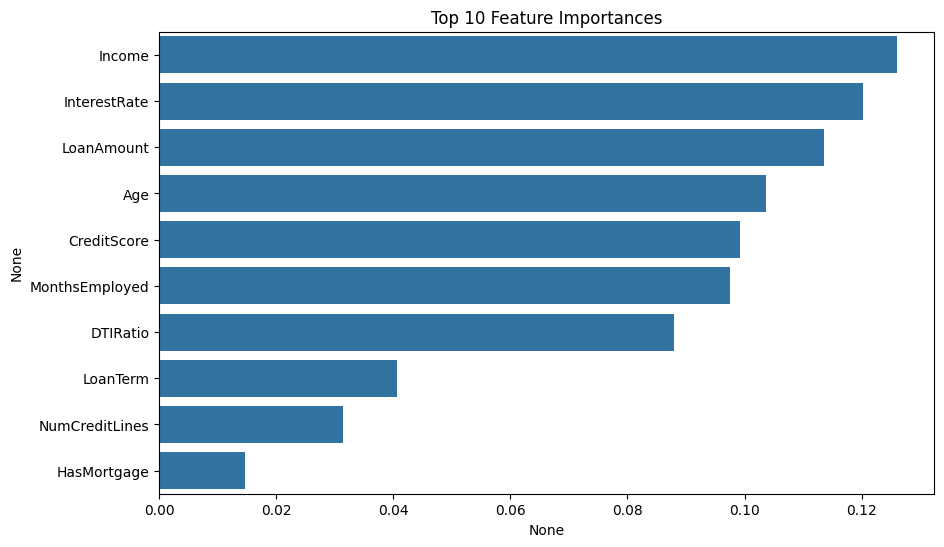

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
plt.title('Top 10 Feature Importances')
plt.show()